In [1]:
# Answer 1

# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings

# Suppressing warnings
warnings.filterwarnings('ignore')

In [2]:
# Answer 2

# Reading the file into a dataframe
credit_df = pd.read_csv('german_credit.csv')

In [3]:
# Checking that it is loaded correctly
credit_df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [4]:
# Checking the shape
credit_df.shape

(1000, 21)

The dataframe has 1000 rows (entries) and 21 columns (attributes). 

In [5]:
# Checking the info
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

There are no nulls in the dataset. <br/>
There are quite a lot of objects/strings which will need to be processed.

In [6]:
# Checking statistical summary
credit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


The target (default) is a little imbalanced as mean < 0.5. <br/>
Duration, installment_as_income, present_res_since are almost normally distributed. <br/>
Credit amount has a tail on the right as the max value is quite higher than 75th percentile. <br/>
Age has a mean close to median, but the max value is quite higher than 75th percentile, indicates some outliers. <br/>
For credits_this_bank, more than half the values have value 1. <br/>
Most of the dataset has value 1 for person_under_maintenance, the rest has value 2. <br/>

In [7]:
# Checking for NaN
credit_df.isna().values.any()

False

In [8]:
# Checking for null values
credit_df.isnull().values.any()

False

In [9]:
# Checking for target imbalance
credit_df['default'].value_counts() 

0    700
1    300
Name: default, dtype: int64

In [10]:
# The ratio is 7:3, upsampling class 1 by 300 to convert the ratio to 7:6
extra_samples = credit_df[credit_df['default'] == 1].sample(300, random_state=1, replace=True).index   
credit_df = pd.concat([credit_df, credit_df.loc[extra_samples, :]])     

In [11]:
# Confirming that the shape and target counts look good now
print(credit_df.shape)
print(credit_df['default'].value_counts())

(1300, 21)
0    700
1    600
Name: default, dtype: int64


In [12]:
# Answer 3

# Storing object/string data in another dataframe
credit_df_objects = credit_df.select_dtypes(include='object')

In [13]:
# Answer 4

# Checking the shape of the new dataframe
credit_df_objects.shape

(1300, 13)

In [14]:
# Checking the info of new dataframe
credit_df_objects.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 714
Data columns (total 13 columns):
account_check_status       1300 non-null object
credit_history             1300 non-null object
purpose                    1300 non-null object
savings                    1300 non-null object
present_emp_since          1300 non-null object
personal_status_sex        1300 non-null object
other_debtors              1300 non-null object
property                   1300 non-null object
other_installment_plans    1300 non-null object
housing                    1300 non-null object
job                        1300 non-null object
telephone                  1300 non-null object
foreign_worker             1300 non-null object
dtypes: object(13)
memory usage: 142.2+ KB


In [15]:
# Answer 5

# Checking the co-relation among the predictors in the original dataset
credit_df.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
default,1.000000,0.217042,0.170813,0.078662,-0.011110,-0.108229,-0.068172,-0.010240
duration_in_month,0.217042,1.000000,0.624145,0.070875,0.046791,-0.010068,0.001955,-0.011470
credit_amount,0.170813,0.624145,1.000000,-0.263922,0.018623,0.076260,0.032648,0.020693
installment_as_income_perc,0.078662,0.070875,-0.263922,1.000000,0.046119,0.041842,-0.006585,-0.071715
present_res_since,-0.011110,0.046791,0.018623,0.046119,1.000000,0.262087,0.101080,0.074620
age,-0.108229,-0.010068,0.076260,0.041842,0.262087,1.000000,0.143783,0.165371
credits_this_bank,-0.068172,0.001955,0.032648,-0.006585,0.101080,0.143783,1.000000,0.102154
people_under_maintenance,-0.010240,-0.011470,0.020693,-0.071715,0.074620,0.165371,0.102154,1.000000


There is no significant co-relation among any predictors. <br/>
There is some co-relation (around 0.62) between credit_amount and duration_in_month. <br/>
present_res_since and people_under_maintenance have the least correlation with the target (both are around -0.01). <br/>

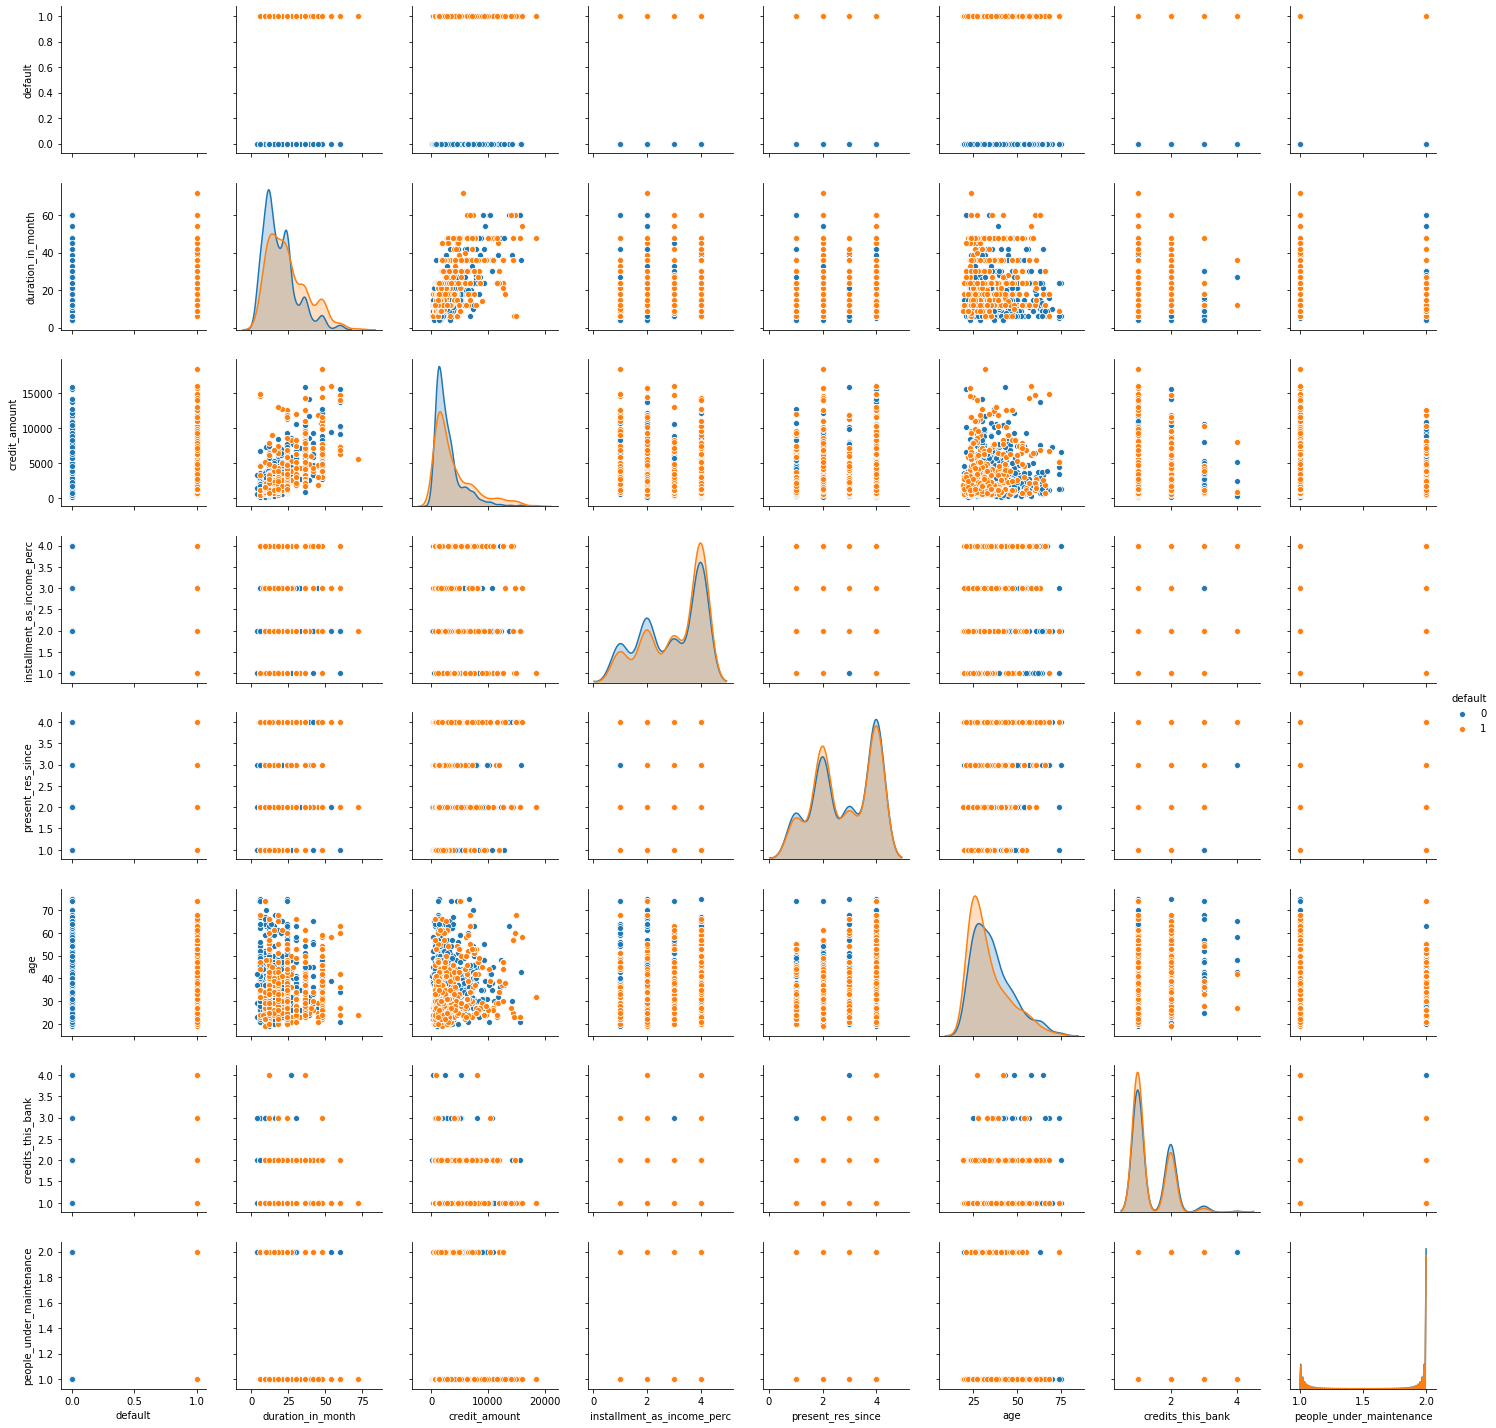

In [16]:
# Answer 6

# Checking pairplot to analyse the data
sns.pairplot(credit_df, hue='default')

The independent attributes have no strong co-relation among each other. <br/>
The density curves for both the target classes are almost overlapping for every attribute. <br/>

In [17]:
numeric_columns = credit_df.columns

# Checking the number of outliers in the dataset
def numOfOutliers():
    for col_name in numeric_columns:
        if credit_df[col_name].dtype != 'object':
            q1 = credit_df[col_name].quantile(0.25)
            q3 = credit_df[col_name].quantile(0.75)
            iqr = q3-q1    # Interquartile range
            fence_low  = q1-1.5*iqr
            fence_high = q3+1.5*iqr
            df_out = credit_df.loc[(credit_df[col_name] < fence_low) | (credit_df[col_name] > fence_high)]
            print(col_name + " -> " + str(df_out.shape[0]))
        
numOfOutliers()

default -> 0
duration_in_month -> 25
credit_amount -> 92
installment_as_income_perc -> 0
present_res_since -> 0
age -> 33
credits_this_bank -> 7
people_under_maintenance -> 198


The number of outliers for most of the attributes is quite low, so it can be ignored. <br/>

In [18]:
# credit_df = credit_df.drop('credit_amount', axis=1)
# credit_df = credit_df.drop('duration', axis=1)

Tried dropping credit_amount and duration_in_month individually but dropping neither of them gives the best result. <br/>
This is probably because the co-relation between them is not so high. <br/>
So, not dropping either of those.

In [19]:
# Dropping the columns least related to target, as they hardly contribute in target prediction
credit_df = credit_df.drop(['present_res_since', 'people_under_maintenance'], axis=1)

In [20]:
# Answer 7

# Encoding the categorical data
credit_df_objects = pd.get_dummies(credit_df_objects, drop_first=True)

In [21]:
# Checking the shape of encoded data
credit_df_objects.shape

(1300, 41)

Dropping the first column of every distinct n columns generated for each attribute. This is as n values can be uniquely expressed using a combination of (n-1) values.

In [22]:
# Answer 8

# Storing numbers in a new dataframe
credit_df_numbers = credit_df.select_dtypes(include=np.number)

# Checking the shape of numeric dataframe
print(credit_df_numbers.shape)

# Merging the encoded data with the numeric data in original dataset
credit_df = pd.concat([credit_df_numbers, credit_df_objects], axis=1)

(1300, 6)


In [23]:
# Checking the final shape
credit_df.shape

(1300, 47)

In [24]:
# Checking info to make sure everything is numeric now
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 714
Data columns (total 47 columns):
default                                                                       1300 non-null int64
duration_in_month                                                             1300 non-null int64
credit_amount                                                                 1300 non-null int64
installment_as_income_perc                                                    1300 non-null int64
age                                                                           1300 non-null int64
credits_this_bank                                                             1300 non-null int64
account_check_status_< 0 DM                                                   1300 non-null uint8
account_check_status_>= 200 DM / salary assignments for at least 1 year       1300 non-null uint8
account_check_status_no checking account                                      1300 non-null uint8
credit_histo

In [25]:
# Separating the target column from features
X = credit_df.drop('default', axis=1)
y = credit_df['default'] 

In [26]:
# Answer 9

test = 0.3
seed = 1

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test, random_state=seed)

In [27]:
# Answer 10

# Applying Random Forest model
rfcl = RandomForestClassifier(random_state=seed)
rfcl = rfcl.fit(X_train, y_train)
y_predict = rfcl.predict(X_test)

In [28]:
# Answer 11

# Printing train and test accuracy
print(rfcl.score(X_train, y_train))
print(rfcl.score(X_test, y_test))

# Printing confusion matrix
print(metrics.confusion_matrix(y_test, y_predict, labels=[0, 1]))

0.9934065934065934
0.8256410256410256
[[187  32]
 [ 36 135]]


The training accuracy is quite high as the random forest forest uses decision tree under the hood which is an overfitting model by default. <br/>
The testing accuracy is also decently good.<br/>
187 people are CORRECTLY predicted to NOT default. (TRUE NEGATIVE) <br/>
32 people are WRONGLY predicted to default. (FALSE POSITIVE) <br/>
36 people are WRONGLY predicted to NOT default. (FALSE NEGATIVE) <br/>
135 people are CORRECTLY predicted to default. (TRUE POSITIVE) <br/>

In [29]:
# Answer 12

# Checking feature importances
feature_importances = pd.DataFrame({'features': X_train.columns, 'Importance': rfcl.feature_importances_})
feature_importances 

,features,Importance
0,duration_in_month,0.073194
1,credit_amount,0.115668
2,installment_as_income_perc,0.041266
3,age,0.100083
4,credits_this_bank,0.014583
5,account_check_status_< 0 DM,0.035249
6,account_check_status_>= 200 DM / salary assign...,0.012651
7,account_check_status_no checking account,0.110220
8,credit_history_critical account/ other credits...,0.044348
9,credit_history_delay in paying off in the past,0.013253


In [30]:
# Answer 13

# Applying GridSearch to tune hyper-parameters
param_grid = {
              'n_estimators': [30, 50, 100],
              'min_samples_leaf': [3, 5, 7],
              'max_depth': [5, 7, 10, 15],
              'criterion': ['entropy', 'gini'],
              'max_features': [30, 40, 46]
             }

gs = GridSearchCV(rfcl, param_grid, cv=10)

# Fitting the gridSearchCV on train data
gs.fit(X_train, y_train)

# Printing the best parameters
print(gs.best_params_)

{'criterion': 'entropy', 'max_depth': 15, 'max_features': 40, 'min_samples_leaf': 3, 'n_estimators': 50}


In [31]:
# Answer 14

# Constructing a new RandomForest model using the above hyper-parameters
rfcl = RandomForestClassifier(n_estimators=50, random_state=seed, min_samples_leaf=3, max_depth=15, 
                              max_features=40, criterion='entropy')
num_folds = 50

# Applying KFold to find out cross validation score
kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(rfcl, X, y, cv=kfold)

# Printing the average accuracy and standard deviation upto 3 decimal places
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 84.846% (8.299%)


Answer 15:

The k-fold cross validation predicts the accuracy of the model to be better than what we had got earlier. This is because we tuned our hyper-parameters. <br/>
We can now say that we may achieve around 85% accuracy (with +=8%) with the model built using best hyper-parameters found using GridSearchCV. <br/>